In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
piloto = pd.read_csv ('D:/Documentos/Estudo Dirigido/Dados4.csv',sep=';',index_col='Amostra',decimal= ',',engine = 'python',skipfooter = 4)
producao = pd.read_csv ('D:/Documentos/Estudo Dirigido/Dados5.csv',sep=';',index_col='Amostra',decimal= ',')

# Fase piloto

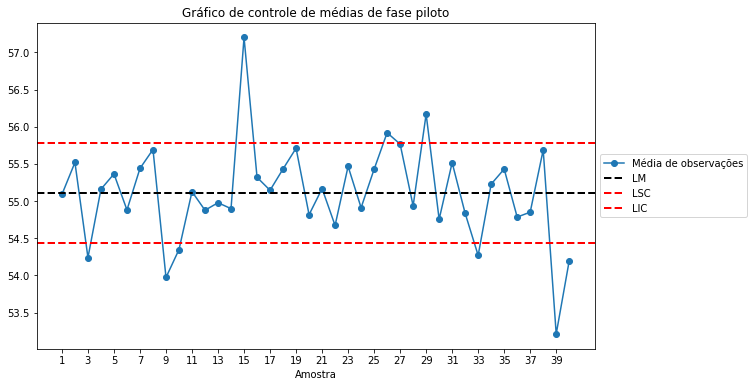

In [3]:
# Calcula a média das médias das amostras
media = piloto.mean(axis=1).mean(axis=0)

# Calcula a média dos desvios padrões das amostras
desvio = piloto.std(axis=1).mean(axis=0)

# Calcula o tamanho da amostra
tamanho_piloto = piloto.shape[0]

# Calcula o desvio padrão amostral dividindo a média dos desvios-padrões das amostras pela raiz do tamanho das amostras
desvio_amostral = desvio / np.sqrt(tamanho_piloto)

# Calcula os limites superior e inferior de controle
LIC = media - 3 * desvio_amostral
LSC = media + 3 * desvio_amostral

# Definição do tamanho da figura, marcação do eixo 'x' e seu título
grafico_1 = plt.figure(figsize = (10,6))
plt.xticks(np.arange(1, tamanho_piloto, 2))
plt.title('Gráfico de controle de médias de fase piloto')

# Plota os dados da fase piloto e linhas de controle
piloto.mean(axis=1).plot(marker="o",label ='Média de observações')
plt.axhline(media, color = 'black', linestyle = 'dashed', linewidth = 2,label= 'LM')
plt.axhline(LSC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LSC')
plt.axhline(LIC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LIC')

# Cria a legenda e coloca-a do lado exterior da figura
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

In [4]:
# Cria lista com valores fora dos limites de controle + 3σ
fora_3 = piloto.index[(piloto.mean(axis=1) >= LIC) & (piloto.mean(axis=1) <= LSC) == False].tolist()

# Verifica se há pontos fora dos limites de controle e os elimina
if len(fora_3) > 0:
    piloto.drop(fora_3,inplace = True)

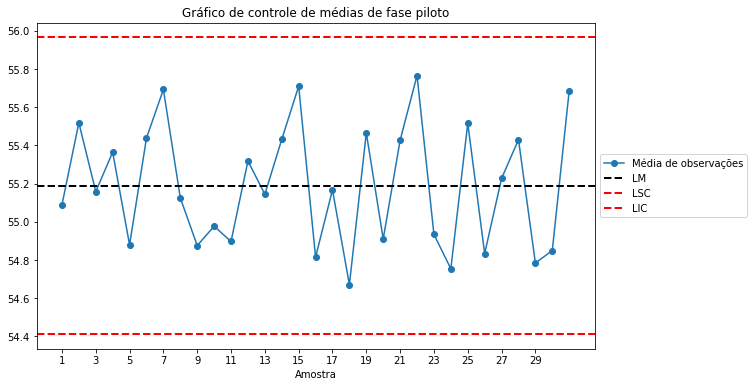

In [5]:
# Reseta o index e adiciona 1 a cada para que não comece de 0
piloto.reset_index(drop=True, inplace=True)
piloto.index += 1

# Calcula a média das médias das amostras
media = piloto.mean(axis=1).mean(axis=0)

# Calcula a média dos desvios padrões das amostras
desvio = piloto.std(axis=1).mean(axis=0)

# Calcula o tamanho da amostra
tamanho_piloto = piloto.shape[0]

# Calcula o desvio padrão amostral dividindo a média dos desvios-padrões das amostras pela raiz do tamanho das amostras
desvio_amostral = desvio / np.sqrt(tamanho_piloto)

# Calcula os limites superior e inferior de controle
LIC = media - 3 * desvio_amostral
LSC = media + 3 * desvio_amostral
LIC2 = media - 2 * desvio_amostral
LSC2 = media + 2 * desvio_amostral

# Definição do tamanho da figura, marcação do eixo 'x' e seu título
grafico_2 = plt.figure(figsize = (10,6))
plt.xticks(np.arange(1, tamanho_piloto, 2))
plt.title('Gráfico de controle de médias de fase piloto')
plt.xlabel('Amostra')

# Plota os dados da fase piloto e linhas de controle
piloto.mean(axis=1).plot(marker="o",label ='Média de observações')
plt.axhline(media, color = 'black', linestyle = 'dashed', linewidth = 2,label= 'LM')
plt.axhline(LSC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LSC')
plt.axhline(LIC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LIC')

# Cria a legenda e coloca-a do lado exterior da figura
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

# Fase de produção

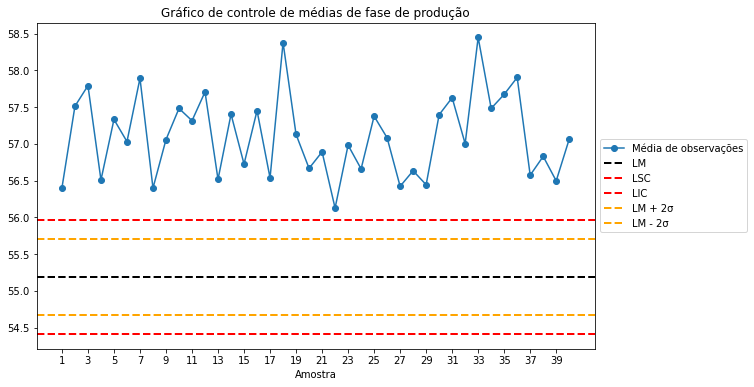

In [6]:
# Definição do tamanho da figura, marcação do eixo 'x' e seu título
grafico_3 = plt.figure(figsize = (10,6))
plt.xticks(np.arange(1,40,2))
plt.title('Gráfico de controle de médias de fase de produção')

# Plota os dados da fase piloto e linhas de controle
ax = producao.mean(axis=1).plot(marker="o",label ='Média de observações')
plt.axhline(media, color = 'black', linestyle = 'dashed', linewidth = 2,label= 'LM')
plt.axhline(LSC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LSC')
plt.axhline(LIC, color = 'r', linestyle = 'dashed', linewidth = 2,label = 'LIC')
plt.axhline(LSC2, color = 'orange', linestyle = 'dashed', linewidth = 2,label = 'LM + 2σ')
plt.axhline(LIC2, color = 'orange', linestyle = 'dashed', linewidth = 2,label = 'LM - 2σ')

# Cria a legenda e coloca-a do lado exterior da figura

leg = plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

In [7]:
# Cria lista com valores fora dos limites de controle + 3σ
fora_3_producao = producao.index[(producao.mean(axis=1) >= LIC) & (producao.mean(axis=1) <= LSC) == False].tolist()

# Cria lista com valores fora dos limites de controle + 2σ
fora_2_producao = producao.index[(producao.mean(axis=1) >= LIC2) & (producao.mean(axis=1) <= LSC2) == False].tolist()

In [8]:
# Cria lista com valores onde há 2 médias amostrais consecutivas fora do intervalo 
# entre média amostral ± 2 desvios-padrão amostral.
conseq = []

for i in range(len(fora_2_producao)-1):
    if fora_2_producao[i]+1 == fora_2_producao[i+1]:
        conseq.append(fora_2_producao[i])
        conseq.append(fora_2_producao[i+1])
    
conseq_2 = list(dict.fromkeys(conseq))

In [9]:
# Cria lista com valores onde há há 3 médias amostrais consecutivas  em que, pelo menos,
# 2 valores estão fora do intervalo entre média amostral ± 2 desvios-padrão amostral.
conseq_3 = []

for i in range(2,40):
    if i in fora_2_producao and (i-1 in fora_2_producao or i+1 in fora_2_producao):
        list = []
        list.append(i-1)
        list.append(i)
        list.append(i+1)
        conseq_3.append(list)
    elif (i not in fora_2_producao) and (i-1 in fora_2_producao) and (i+1 in fora_2_producao):
        list = []
        list.append(i-1)
        list.append(i)
        list.append(i+1)
        conseq_3.append(list)

In [10]:
# Cria arquivo pdf com nome 'Gráficos.pdf' e salva os 3 gráficos em cada página.
with PdfPages('Gráficos_Atividade_4.pdf') as pdf:
    pdf.savefig(grafico_1, bbox_inches='tight')
    pdf.savefig(grafico_2, bbox_inches='tight')
    pdf.savefig(grafico_3, bbox_inches='tight')

In [11]:
# Cria arquivo txt com nome 'Informações.txt' e salva os valores LM, LSC, LIC e os 
# resultados das verificaçõesde valores fora dos intervalos
with open('Informações_Atividade_4.txt', 'w') as text_file:
    text_file.write(' LM = {:.2f}\n'.format(media))
    text_file.write(' LIC = {:.2f}\n'.format(LIC))
    text_file.write(' LSC = {:.2f}\n'.format(LSC))
    text_file.write(' As amostras: {} apresentam médias amostrais fora do intervalo entre média amostral ± 3 desvios-padrão amostral;\n'.format(fora_3_producao))
    text_file.write(' As amostras: {} apresentam 2 médias amostrais consecutivas fora do intervalo entre média amostral ± 2 desvios-padrão amostral;\n'.format(conseq_2))
    text_file.write(' As amostras: {} apresentam pelo menos 2 valores que estão fora do intervalo entre média amostral ± 2 desvios-padrão amostral;\n'.format(conseq_3))